In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///SurfsUp/Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
# Answer: ('2017-08-23',)
precipitation_data = session.query(measurement.date, measurement.prcp)
recent_date = precipitation_data.order_by(measurement.date.desc()).first()
recent_date = recent_date[0]
recent_date

'2017-08-23'

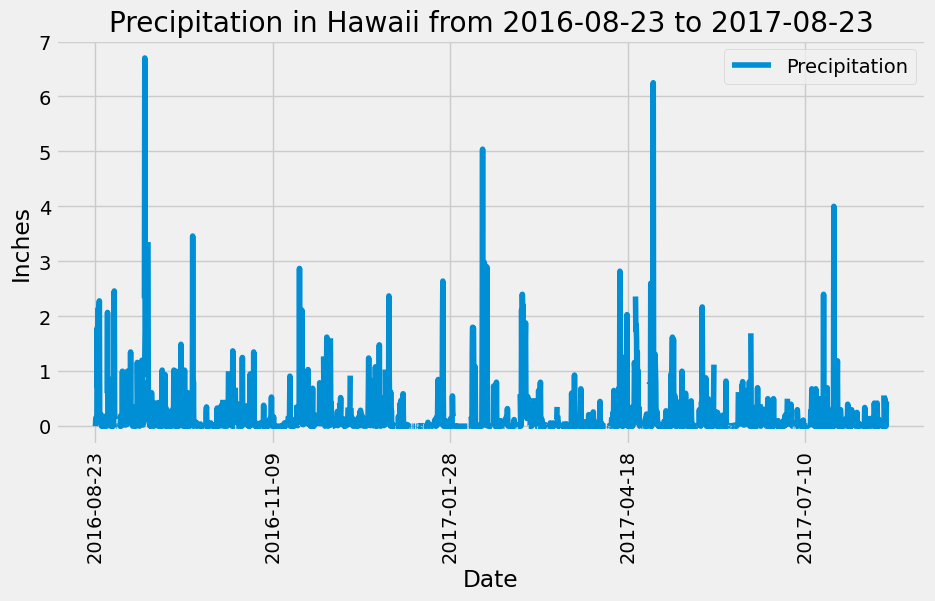

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_date = (dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
last_date

# Perform a query to retrieve the data and precipitation scores
precipitation_query = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= last_date).\
    filter(measurement.date <= recent_date).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_query, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='Date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='Date', y='Precipitation', rot=90, figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation in Hawaii from 2016-08-23 to 2017-08-23')
plt.show()

In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df.describe()
summary_statistics

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset: [(9,)]
number_of_stations = session.query(station.station).count()
number_of_stations

9

In [26]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

stations_rows_count = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
stations_rows_count



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# [(54.0, 85.0, 71.66378066378067)]
temps = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
temps_query = session.query(*temps).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).first()
temps_query


(54.0, 85.0, 71.66378066378067)

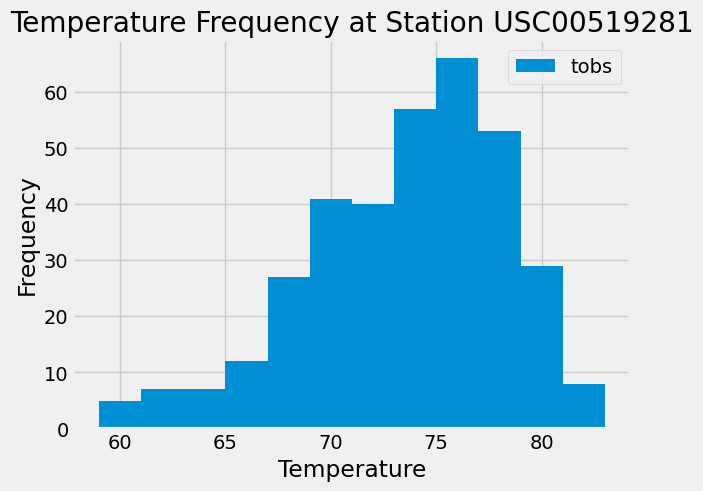

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = stations_rows_count[0][0]
query = session.query(measurement.tobs).\
    filter(measurement.date >= last_date).\
    filter(measurement.date <= recent_date).\
    filter(measurement.station == most_active_station).all()
tempuratures = [temp[0] for temp in query]
plt.hist(tempuratures, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.title('Temperature Frequency at Station USC00519281')
plt.show()

# Close Session

In [47]:
# Close Session
session.close()